In [1]:
import pandas as pd
import numpy as np
 
from sklearn import datasets
from sklearn import cluster

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # required for 3D projection to work

In [2]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

In [3]:
# Load the Iris dataset 
raw_data = datasets.load_iris()
irises = pd.DataFrame(data=raw_data.data, columns=raw_data.feature_names)
irises.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Fit a k-means estimator, K = 3 on the whole dataset using all numeric features
kmeans = cluster.KMeans(n_clusters=3).fit(irises)
# Obtain clustering results using labels_ attribute of the KMeans class
irises = irises.assign(labels=kmeans.labels_)
irises.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


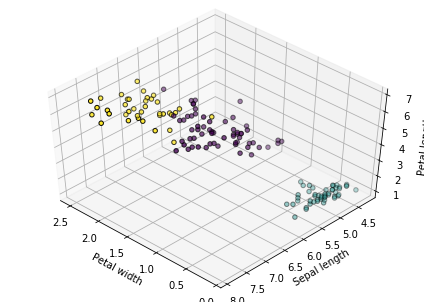

In [5]:
# Plot all clusters in one plot using Axes3D.scatter
fig = plt.figure(1, figsize=(6, 4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.scatter(irises["petal width (cm)"], irises["sepal length (cm)"], irises["petal length (cm)"],
               c=kmeans.labels_.astype(np.float), edgecolor='k')
matplotlib.pyplot.show()

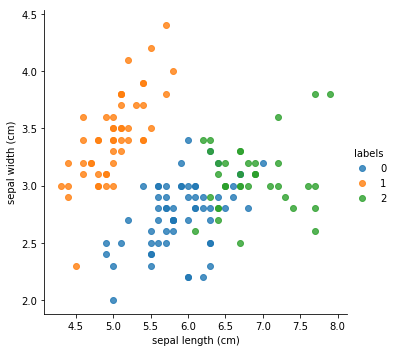

In [6]:
# Plot a “sepal length vs. sepal width” plot using clustering labels as the hue parameter
sns.lmplot(
    "sepal length (cm)", "sepal width (cm)", 
    data=irises, hue="labels", fit_reg=False
)
matplotlib.pyplot.show()

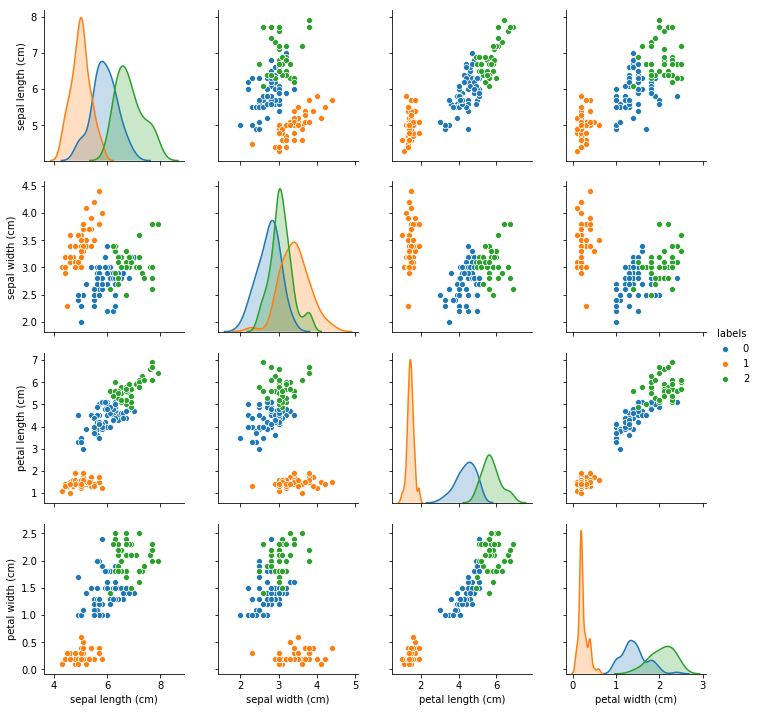

In [7]:
# Plot a pair-plot of the iris dataset (for all numeric features) using clustering labels as the hue parameter. 
sns.pairplot(
    data=irises, hue="labels", 
    vars=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
)